# Numpy 1D-DFT
- reference: http://dcwww.camd.dtu.dk/~askhl/files/python-dft-exercises.pdf
- Goal: write our own Kohn-Sham (KS) DFT code
    - Target: a harmonic oscillator including kinetic energy, electrostatic repulsion between the electrons, and the local density approximation for electronic interactions, ignoring correlation.
    - Hamiltonian:
    
$$\hat{H}=-\frac{1}{2}\frac{d^2}{dx^2}+v(x)\\
v(x)=v_{Ha}(x)+v_{LDA}(x)+x^2$$

- What we have to do?
    1. Represent the Hamiltonian
    1. Calculate the KS wavefunctions, the density

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style("white")

# Differential operator
- In order to represent kinetic operator
- In this section, our goal is to differentiate a sin curve, represented as a grid function as folllows:

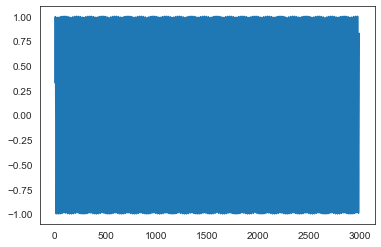

In [4]:
n_grid=3000
x=np.linspace(1e-9,1000,n_grid+1)[1:]
y=np.sin(x)
plt.plot(y)

### First order differentiation

- approximate:

$$(\frac{dy}{dx})_{i}=\frac{y_{i+1}-{y_{i}}}{h}$$

- then:

$$D_{ij}=\frac{\delta_{i+1,j}-\delta_{i,j}}{h}$$

- we could write as follows:

$$(\frac{dy}{dx})_{i}=D_{ij} y_{j}$$


- The derivative may not be well defined at the end of the grid.
- $\delta_{ij}$ is Kronecker delta
- Einstein summation is used for last equation

In [5]:
h=x[1]-x[0]
D=-np.eye(n_grid)+np.diagflat(np.ones(n_grid-1),1)
D = D / h

### Second oorder differentiation

- In the same way as the first order:

$$D^2_{ij}=\frac{\delta_{i+1,j}-2\delta_{i,j}+\delta_{i-1,j}}{h^2}$$

- This could be written with the first order $D_{ij}$, as follows (take care of the transpose):

$$D^2_{ij}=-D_{ik}D_{jk}$$

- The derivative may not be well defined at the end of the grid.

In [6]:
D2=D.dot(-D.T)
D2[-1,-1]=D2[0,0]

In [8]:
D2/9

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

### 確認

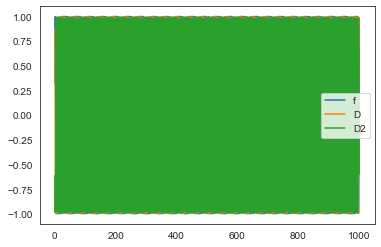

In [18]:
sns.set_style("white")
plt.plot(x,y, label="f")
plt.plot(x[:-1],D.dot(y)[:-1], label="D")
plt.plot(x[1:-1],D2.dot(y)[1:-1], label="D2")
plt.legend()

# Non-interacting electrons
- This is the Hamiltonian of non-interacting free particles in a box given by the size of grid:
$$\hat{H} = \hat{T} = - \frac{1}{2} \frac{d^2}{dx^2}$$

- We could solve the KS equation as follows:

In [10]:
eig_non, psi_non=np.linalg.eigh(-D2/2)

- plot (energies are shown in the label)

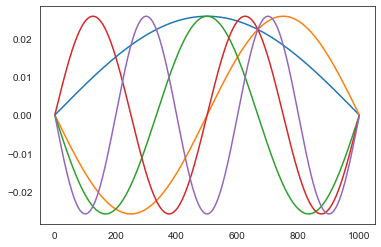

In [11]:
for i in range(5):
    plt.plot(x,psi_non[:,i], label=f"{eig_non[i]:.4f}")
    # plt.legend(loc=1)

# Harmonic oscillator
- include the external potential $v_{ext}=x^2$:
$$\hat{H} = \hat{T} = - \frac{1}{2} \frac{d^2}{dx^2} - \frac{1}{r}$$

- we can write the potential as a matrix $X$, as follows:

In [21]:
X=np.diagflat(1/x)

- and solve the KS.

In [22]:
X

array([[2.99999999e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.50000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.99999999e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00066711e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00033344e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e-03]])

In [23]:
eig_harm, psi_harm = np.linalg.eigh(-D2/2-X)

- plot

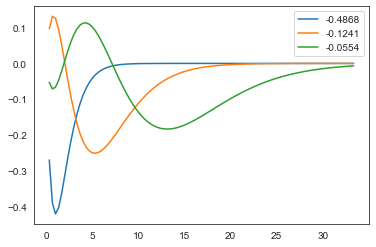

In [28]:
for i in range(3):
    plt.plot(x[:100],psi_harm[:100,i], label=f"{eig_harm[i]:.4f}")
    plt.legend(loc=1)

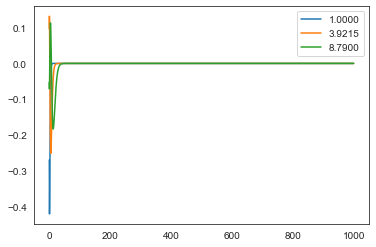

In [27]:
for i in range(3):
    plt.plot(x,psi_harm[:,i], label=f"{eig_harm[0] / eig_harm[i]:.4f}")
    plt.legend(loc=1)

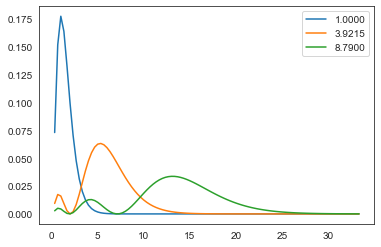

In [26]:
for i in range(3):
    plt.plot(x[:100],psi_harm[:100,i] * psi_harm[:100,i], label=f"{eig_harm[0] / eig_harm[i]:.4f}")
    plt.legend(loc=1)

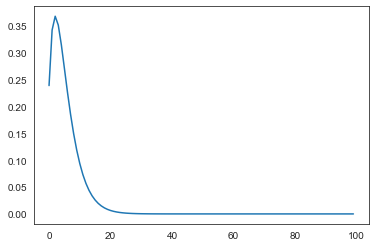

In [104]:
plt.plot(x[:100:]*np.exp(-x[:100:]))

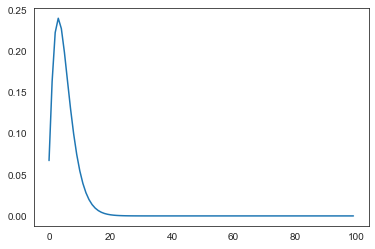

In [116]:
plt.plot(x[:100:]*x[:100]*np.exp(-1.5*x[:100:]))

# Well potential

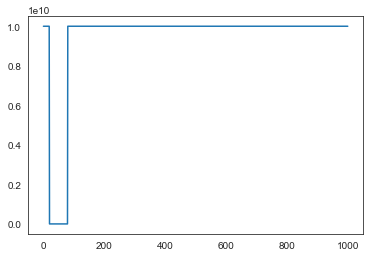

In [44]:
w=np.full_like(x,1e10)
w[np.logical_and(x>0.2,x<0.8)]=0.
plt.plot(w)

- solve the KS

In [45]:
eig_well, psi_well= np.linalg.eigh(-D2/2+np.diagflat(w))

- plot

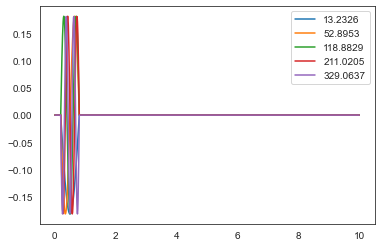

In [46]:
for i in range(5):
    plt.plot(x,psi_well[:,i], label=f"{eig_well[i]:.4f}")
    plt.legend(loc=1)

# Density
- We will want to include the Coulomb or Hatree interacion as well as LDA exchange
- Both of which are density functinals
- So we need to calculate the electron density
- Each state should be normalized:
$$\int \lvert \psi \rvert ^2 dx = 1$$

- let $f_n$ be occupation numbers, the density $n(x)$ can be written as follows:
$$n(x)=\sum_n f_n \lvert \psi(x) \rvert ^2 $$

- Note:
    - Each state fits up to two electrons: one with spin up, and one with spin down.
    - In DFT, we calculate the ground state.

In [47]:
# integral
def integral(x,y,axis=0):
    dx=x[1]-x[0]
    return np.sum(y*dx, axis=axis)

- number of electrons

In [48]:
num_electron=17

- density

In [49]:
def get_nx(num_electron, psi, x):
    # normalization
    I=integral(x,psi**2,axis=0)
    normed_psi=psi/np.sqrt(I)[None, :]
    
    # occupation num
    fn=[2 for _ in range(num_electron//2)]
    if num_electron % 2:
        fn.append(1)

    # density
    res=np.zeros_like(normed_psi[:,0])
    for ne, psi  in zip(fn,normed_psi.T):
        res += ne*(psi**2)
    return res

- plot

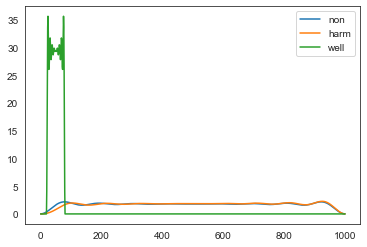

In [50]:
plt.plot(get_nx(num_electron,psi_non, x), label="non")
plt.plot(get_nx(num_electron,psi_harm, x), label="harm")
plt.plot(get_nx(num_electron,psi_well, x), label="well")
plt.legend(loc=1)

# Exchange energy
- Consider the exchange functional in the LDA:
    - ignore the correlation for simplicity.

$$ E_X^{LDA}[n] = -\frac{3}{4} \left(\frac{3}{\pi}\right)^{1/3} \int n^{4/3} dx$$

- The potential is given by the derivative of the exchange energy with respect to the density:

$$ v_X^{LDA}[n] = \frac{\partial E_X^{LDA}}{\partial n} = - \left(\frac{3}{\pi}\right)^{1/3} n^{1/3}$$

- code

In [51]:
def get_exchange(nx,x):
    energy=-3./4.*(3./np.pi)**(1./3.)*integral(x,nx**(4./3.))
    potential=-(3./np.pi)**(1./3.)*nx**(1./3.)
    return energy, potential

# coulomb potential
- Electrostatic energy or Hatree energy
- The expression of 3D-Hatree energy is not converged in 1D.
- Hence we cheat and use a modified as follows:
$$ E_{Ha}=\frac{1}{2}\iint \frac{n(x)n(x')}{\sqrt{(x-x')^2+\varepsilon}}dxdx'$$

    - where $\varepsilon$ is a small positive constant

- The potential is given by:
$$ v_{Ha}=\int \frac{n(x')}{\sqrt{(x-x')^2+\varepsilon}}dx'$$

- In a matirx expression:
$$E_{Ha} = \frac{1}{2} \frac{n_in_jh^2}{\sqrt{(x_{i}-x_{j})^2+\varepsilon}}$$
$$v_{Ha, i} = \frac{n_jh}{\sqrt{(x_{i}-x_{j})^2+\varepsilon}}$$

In [52]:
def get_hatree(nx,x, eps=1e-1):
    h=x[1]-x[0]
    energy=np.sum(nx[None,:]*nx[:,None]*h**2/np.sqrt((x[None,:]-x[:,None])**2+eps)/2)
    potential=np.sum(nx[None,:]*h/np.sqrt((x[None,:]-x[:,None])**2+eps),axis=-1)
    return energy, potential

# Solve the KS equation：Self-consistency loop
0. initialize the density (you can take an arbitrary constant)
1. Calculate the Exchange and Hatree potentials
2. Calculate the Hamiltonian
3. Calculate the wavefunctions and eigen values
4. If not converged, calculate the density and back to 1.

In [53]:
def print_log(i,log):
    print(f"step: {i:<5} energy: {log['energy'][-1]:<10.4f} energy_diff: {log['energy_diff'][-1]:.10f}")

In [54]:
max_iter=1000
energy_tolerance=1e-5
log={"energy":[float("inf")], "energy_diff":[float("inf")]}

In [55]:
nx=np.zeros(n_grid)
for i in range(max_iter):
    ex_energy, ex_potential=get_exchange(nx,x)
    ha_energy, ha_potential=get_hatree(nx,x)
    
    # Hamiltonian
    H=-D2/2+np.diagflat(ex_potential+ha_potential+x*x)
    
    energy, psi= np.linalg.eigh(H)
    
    # log
    log["energy"].append(energy[0])
    energy_diff=energy[0]-log["energy"][-2]
    log["energy_diff"].append(energy_diff)
    print_log(i,log)
    
    # convergence
    if abs(energy_diff) < energy_tolerance:
        print("converged!")
        break
    
    # update density
    nx=get_nx(num_electron,psi,x)
else:
    print("not converged")

step: 0     energy: 2.1024     energy_diff: -inf
step: 1     energy: 19.5608    energy_diff: 17.4584670683
step: 2     energy: 18.2098    energy_diff: -1.3510542676
step: 3     energy: 18.8718    energy_diff: 0.6620621614
step: 4     energy: 18.5470    energy_diff: -0.3248095470
step: 5     energy: 18.7035    energy_diff: 0.1564871529
step: 6     energy: 18.6281    energy_diff: -0.0754335684
step: 7     energy: 18.6644    energy_diff: 0.0363144417
step: 8     energy: 18.6469    energy_diff: -0.0175131170
step: 9     energy: 18.6553    energy_diff: 0.0084504190
step: 10    energy: 18.6513    energy_diff: -0.0040811481
step: 11    energy: 18.6532    energy_diff: 0.0019717710
step: 12    energy: 18.6523    energy_diff: -0.0009529913
step: 13    energy: 18.6527    energy_diff: 0.0004606808
step: 14    energy: 18.6525    energy_diff: -0.0002227262
step: 15    energy: 18.6526    energy_diff: 0.0001076898
step: 16    energy: 18.6526    energy_diff: -0.0000520715
step: 17    energy: 18.6526   

- plot

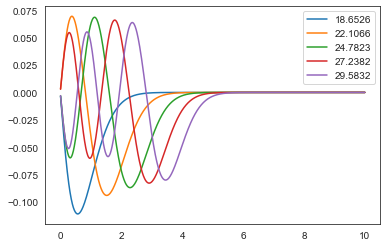

In [56]:
for i in range(5):
    plt.plot(x,psi[:,i], label=f"{energy[i]:.4f}")
    plt.legend(loc=1)

- compare the density to free particles

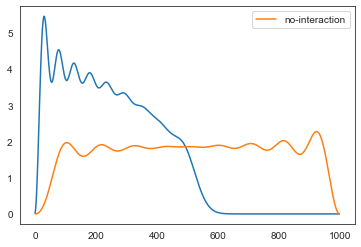

In [57]:
plt.plot(nx)
plt.plot(get_nx(num_electron,psi_harm,x), label="no-interaction")
plt.legend()